In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d pranavraikokte/covid19-image-dataset

Dataset URL: https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset
License(s): CC-BY-SA-4.0
100% 158M/158M [00:11<00:00, 18.5MB/s]
100% 158M/158M [00:11<00:00, 14.2MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/covid19-image-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.applications.vgg16 import VGG16

In [6]:
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(256,256,3)
)

58889256/58889256 [==============================] - 4s 0us/step


In [8]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [10]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [11]:
conv_base.trainable = False

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 23104323 (88.14 MB)
Trainable params: 8389635 (32.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [18]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Covid19-dataset/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Covid19-dataset/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


In [19]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
8/8 [==============================] - 24s 1s/step - loss: 5.6571 - accuracy: 0.4622 - val_loss: 1.9376 - val_accuracy: 0.3636
Epoch 2/10
8/8 [==============================] - 6s 348ms/step - loss: 0.6820 - accuracy: 0.8207 - val_loss: 1.1664 - val_accuracy: 0.6667
Epoch 3/10
8/8 [==============================] - 6s 346ms/step - loss: 0.2591 - accuracy: 0.9283 - val_loss: 0.3690 - val_accuracy: 0.8485
Epoch 4/10
8/8 [==============================] - 6s 349ms/step - loss: 0.2468 - accuracy: 0.9402 - val_loss: 0.1961 - val_accuracy: 0.9091
Epoch 5/10
8/8 [==============================] - 5s 273ms/step - loss: 0.0474 - accuracy: 0.9801 - val_loss: 0.3217 - val_accuracy: 0.8182
Epoch 6/10
8/8 [==============================] - 6s 270ms/step - loss: 0.0426 - accuracy: 0.9841 - val_loss: 0.1680 - val_accuracy: 0.9242
Epoch 7/10
8/8 [==============================] - 5s 275ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.1088 - val_accuracy: 0.9545
Epoch 8/10
8/8 [======

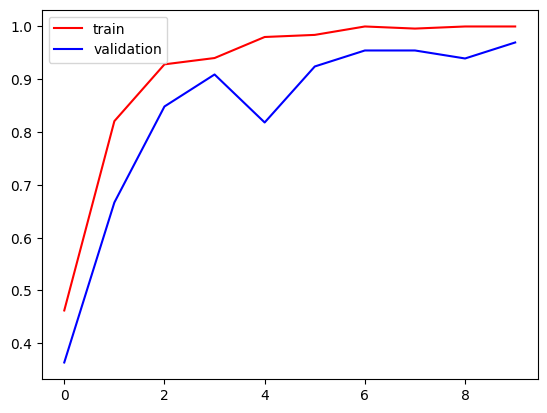

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

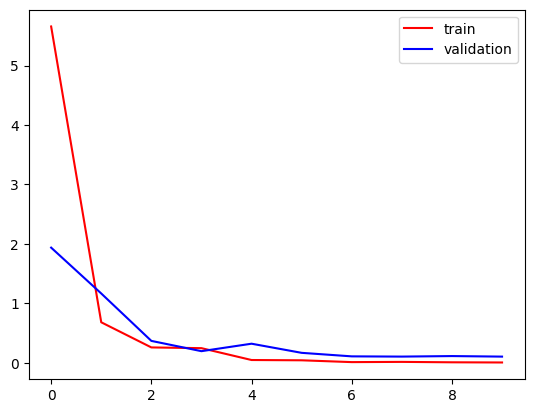

In [22]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()